# Part II - Factors That Influence Data Science Job Salaries
## by Morris Mensah



## Investigation Overview


In this investigation, I wanted to look at the factors that have impact on data science job salaries. The main focus was on experience level, company size, and comapny location. 


## Dataset Overview

This dataset contains information about the various data science jobs and their respective salaries based on some factors like experience level, company size,and many more.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# setting up the file location
import os
os.chdir(r"C:\Users\RICHARD\Desktop\DS\Data Sets")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('ds_salaries.csv')

In [3]:
# convert experience_level and company_size into ordered categorical types
ordered_feature_dict = {'experience_level' : ['EN','MI', 'SE', 'EX'],
                    'company_size' : ['S', 'M', 'L']}


for feature in ordered_feature_dict:
    ordered_feature = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordered_feature_dict[feature])
    df[feature] = df[feature].astype(ordered_feature)
    
# convert remote_ratio to categorical dtype
df['remote_ratio'] = df['remote_ratio'].astype('category')

## Distribution of Salaries

Salaries of data science professionals in the dataset looks skewed to the left with most of the workers salaries falling below $200000 and is at peak at above 100000 usd.

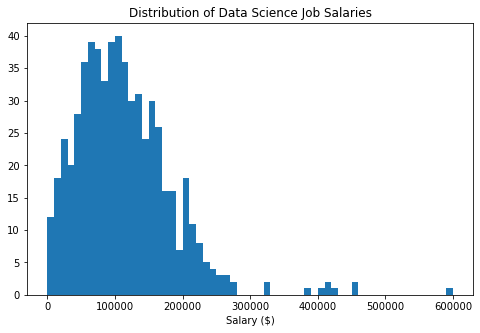

In [4]:
# salary distribution with a standard-saled plot
binsize = 10000
bins = np.arange(0, df['salary_in_usd'].max()+binsize, binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'salary_in_usd', bins = bins)
plt.title('Distribution of Data Science Job Salaries')
plt.xlabel('Salary ($)')
plt.show()

## Distribution of Experience Level

Majority of data science professionals in the data set are senior-level or expert data science professionals and few falling within the executive category.

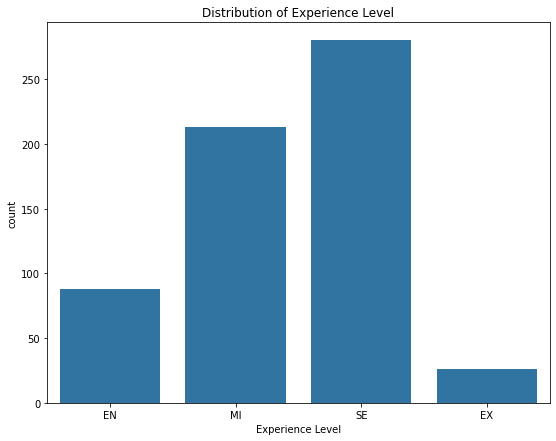

In [5]:
# let's plot the distribution of the workers experience
plt.figure(figsize = [9, 7])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'experience_level', color = default_color)
plt.title('Distribution of Experience Level')
plt.xlabel('Experience Level')
plt.show()

## Salaries vs. Experience Level

Experience level has a high level of impact on the salaries of data science professionals. In other words, there is a relationship between the salaries and the experience level. The more experienced the worker, the higher the salary.

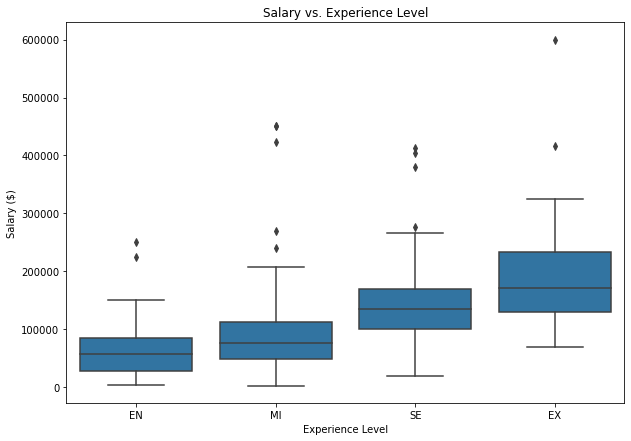

In [6]:
base_color = sb.color_palette()[0]
plt.figure(figsize = [10, 7])
sb.boxplot(data= df, x='experience_level', y='salary_in_usd', color=base_color)
plt.title('Salary vs. Experience Level')
plt.ylabel('Salary ($)')
plt.xlabel('Experience Level')
plt.show()

##  Experience Level and Company Size by Salary

There is an interaction effect visible between experience level, company size and the salaries of the data science professionals. It looks like the median salary for different company sizes(S, M, L) varies as the company grows in size except for the median salary of large size companies being smaller(S) than the medium(M) size company. However, the relationship can clearly been seen when the maximum salary for different company size is used. We see that as the company grows in size, the maximum salary also increases. 

In [7]:
# assist function for plotting 
def exp_size_by_sal(var, color):
    fig, ax = plt.subplots(ncols = 2, figsize = [15,8])
    sb.boxplot(data = df, y = var, x = 'experience_level', ax = ax[0],
                  color = color)
   
    ax[0].set_xlabel("Experience Level")
    ax[0].set_ylabel(var.capitalize())
    sb.boxplot(data = df, y = var, x = 'company_size', ax = ax[1],
               color = color)
    ax[1].set_xlabel("Company Size")
    ax[1].set_ylabel("")
    fig.suptitle('Experience Level and Company Size by Salary ($)')
    plt.show()

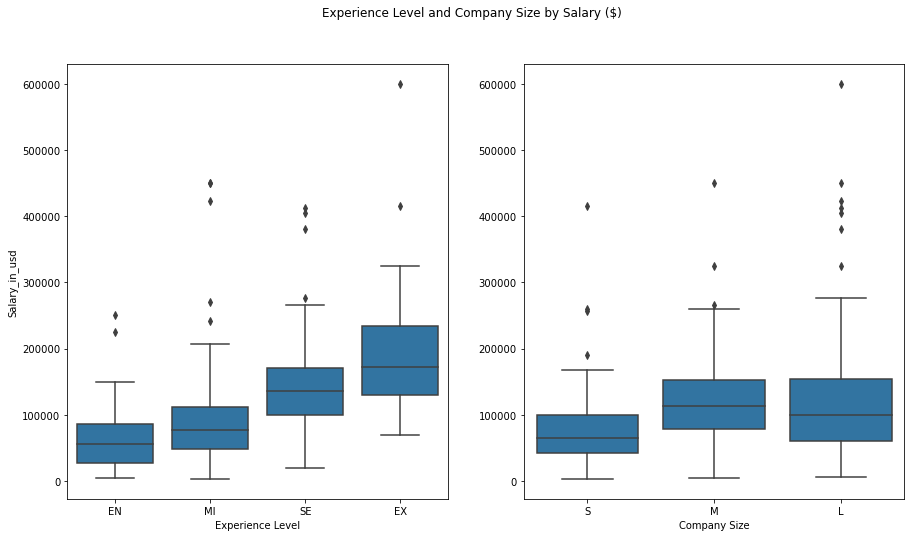

In [8]:
exp_size_by_sal('salary_in_usd', sb.color_palette()[0])

## Salary by Experience Level and Company Location

In this plot we can easily see where the dense salary group are in different company location across the levels of experience. If we take USA for instance, the salary is much more concentrated little below 300000 with the senior experience level(SE) having much of the concentration and also few people earning above 300000. For the rest of the company location, the salary is approximately below 250000 across all levels of experience.

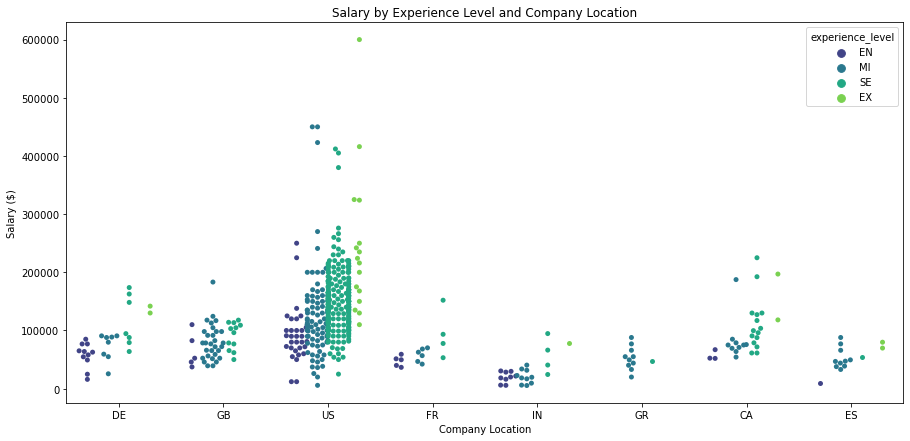

In [9]:
# I will select some few company locations to avoid over-plotting
loc = ['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR']
sub_loc = df[df['company_location'].isin(loc)]

plt.figure(figsize=(15,7))
sb.swarmplot(x='company_location', y='salary_in_usd', data=sub_loc, hue='experience_level', dodge=True, palette='viridis')
plt.title('Salary by Experience Level and Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary ($)')
plt.show()

In [ ]:
!jupyter nbconvert SlideDeck_DS_Salaries.ipynb --to slides --post serve --no-input --no-prompt 